<a href="https://colab.research.google.com/github/VozSoldat/PCVK-Ganjil-2025/blob/main/Week5_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D-1 Percobaan histogram

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

## Membuat histogram citra

### input image

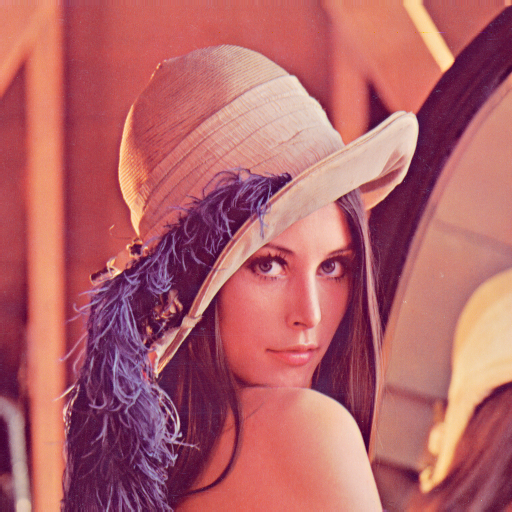

In [110]:

image = cv2.imread('/content/drive/MyDrive/PCVK/lenna.png')
if image is None:
    print('Failed to load image file')
else:
    cv2_imshow(image)

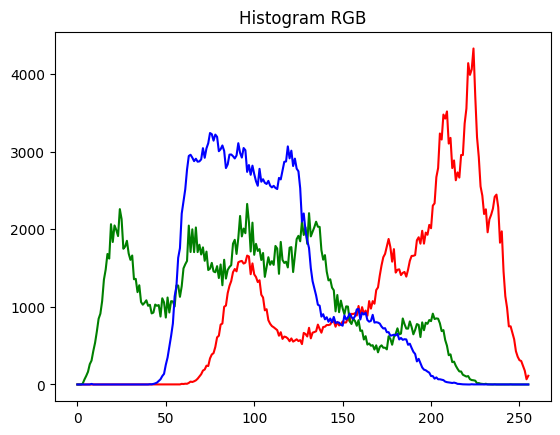

In [111]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)



height, width, channels = np.shape(image)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0,height):
  for x in range(0,width):
    red[image[y, x, 0]] += 1
    green[image[y, x, 1]] += 1
    blue[image[y, x, 2]] += 1

names = np.arange(256)

plt.plot(names, red, color='red')
plt.plot(names, green, color='green')
plt.plot(names, blue, color='blue')

plt.title('Histogram RGB')
plt.show()


#### dengan library NumPy

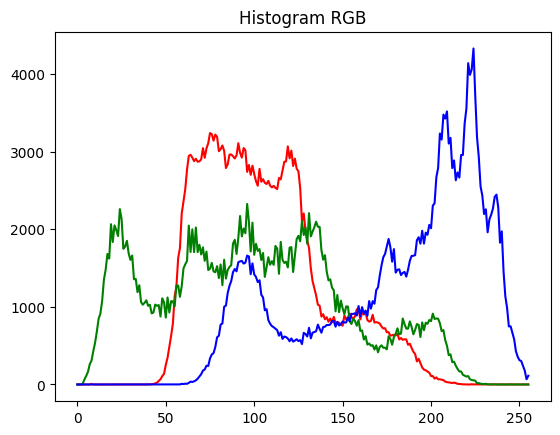

In [112]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

histogram_r = np.histogram(image[:, :, 0], bins=256, range=(0, 256))[0]
histogram_g = np.histogram(image[:, :, 1], bins=256, range=(0, 256))[0]
histogram_b = np.histogram(image[:, :, 2], bins=256, range=(0, 256))[0]

plt.plot(histogram_r, color='red')
plt.plot(histogram_g, color='green')
plt.plot(histogram_b, color='blue')
plt.title('Histogram RGB')
plt.show()

#### dengan library OpenCV

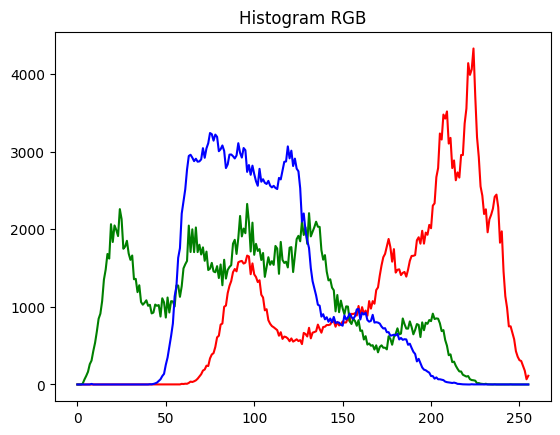

In [113]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

histogram_r = cv2.calcHist([image], [0], None, [256], [0, 256])
histogram_g = cv2.calcHist([image], [1], None, [256], [0, 256])
histogram_b = cv2.calcHist([image], [2], None, [256], [0, 256])


plt.plot(histogram_r, color='red')
plt.plot(histogram_g, color='green')
plt.plot(histogram_b, color='blue')
plt.title('Histogram RGB')
plt.show()

### analisis histogram KTM

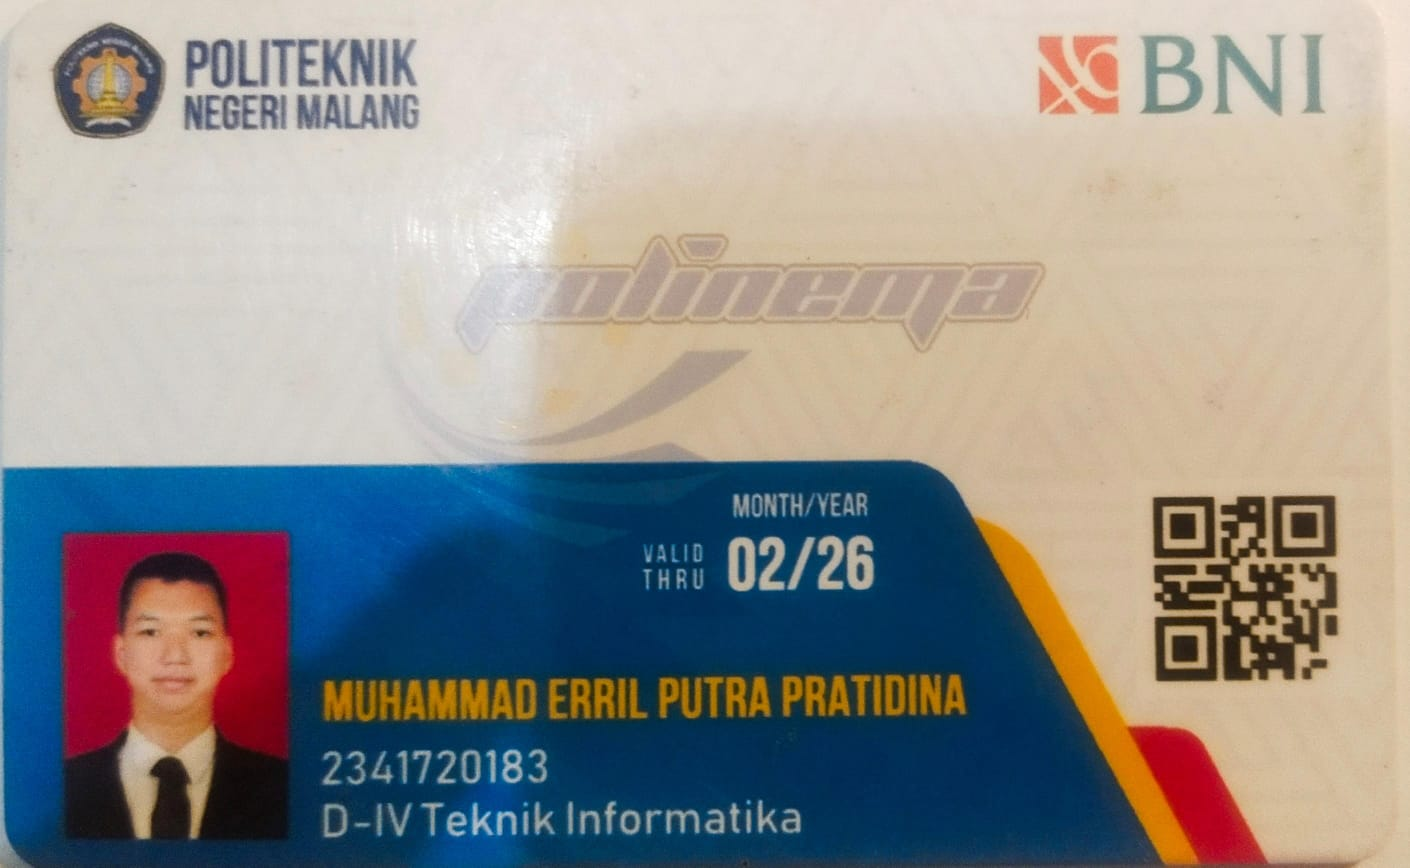

In [114]:
ktm = cv2.imread('/content/drive/MyDrive/PCVK/KTM.jpeg')
if ktm is None:
    print('Failed to load image file')
else:
    cv2_imshow(ktm)

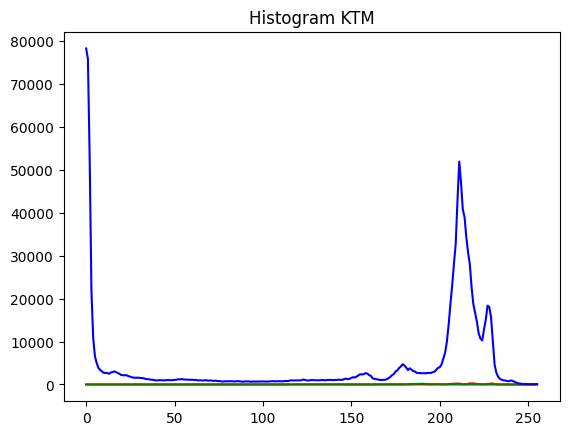

In [115]:
ktm = cv2.cvtColor(ktm, cv2.COLOR_BGR2RGB)

histogram_r = np.histogram(ktm[0, :, :], bins=256, range=(0, 256))[0]
histogram_g = np.histogram(ktm[:, 0, :], bins=256, range=(0, 256))[0]
histogram_b = np.histogram(ktm[:, :, 0], bins=256, range=(0, 256))[0]

plt.plot(histogram_r, color='red')
plt.plot(histogram_g, color='green')
plt.plot(histogram_b, color='blue')
plt.title('Histogram KTM')
plt.show()

### jawab
gambar cenderung kontras dengan channel biru yang sangat mendominasi

# D-2 Histogram equalization



## algoritma

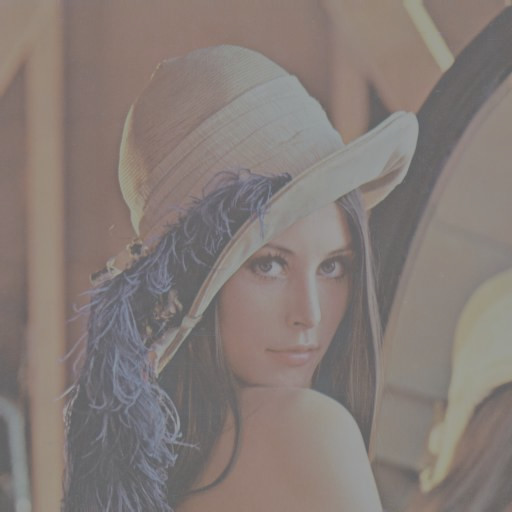

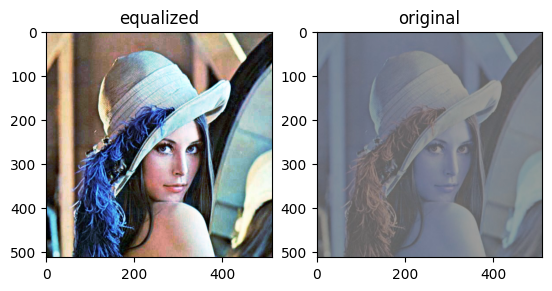

In [116]:
def custom_equalize_hist(image):
    histogram = np.zeros(256, dtype=int)
    height, width = image.shape
    for y in range(height):
        for x in range(width):
            histogram[image[y, x]] += 1

    cdf = np.zeros(256, dtype=float)
    cdf[0] = histogram[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + histogram[i]

    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    cdf_normalized = cdf_normalized.astype('uint8')

    equalized_image = np.zeros_like(image)
    for y in range(height):
        for x in range(width):
            equalized_image[y, x] = cdf_normalized[image[y, x]]

    return equalized_image


image = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
if image is None:
    print('Failed to load image file')
else:
    cv2_imshow(image)



red, green, blue = cv2.split(image)


r_equalized = custom_equalize_hist(red)
g_equalized = custom_equalize_hist(green)
b_equalized = custom_equalize_hist(blue)


result = cv2.cvtColor( cv2.merge((r_equalized, g_equalized, b_equalized)), cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(result)
plt.title('equalized')
plt.subplot(122)
plt.imshow(image)
plt.title('original')
plt.show()

## equalize hist

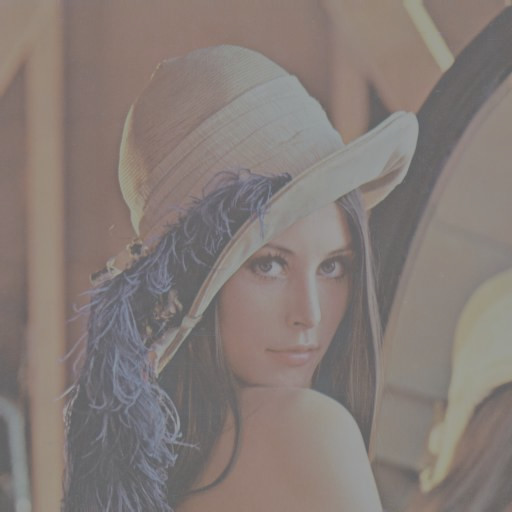

In [117]:
image = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
if image is None:
    print('Failed to load image file')
else:
    cv2_imshow(image)



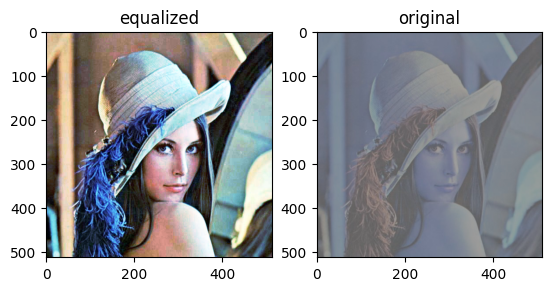

In [118]:
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

red, green, blue = cv2.split(image)


r_equalized = cv2.equalizeHist(red)
g_equalized = cv2.equalizeHist(green)
b_equalized = cv2.equalizeHist(blue)


result = cv2.cvtColor( cv2.merge((r_equalized, g_equalized, b_equalized)), cv2.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(result)
plt.title('equalized')
plt.subplot(122)
plt.imshow(image)
plt.title('original')
plt.show()

## pertanyaan praktikum D-2

### perbandingan citra Lena (PSNR)

In [119]:
def psnr(original, compared):
    mse = np.mean((original - compared) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 10 * np.log10((max_pixel ** 2) / mse)


psnr = psnr(image, result)

print("psnr: ",psnr)

psnr:  27.73212980722723


### perbandingan citra KTM

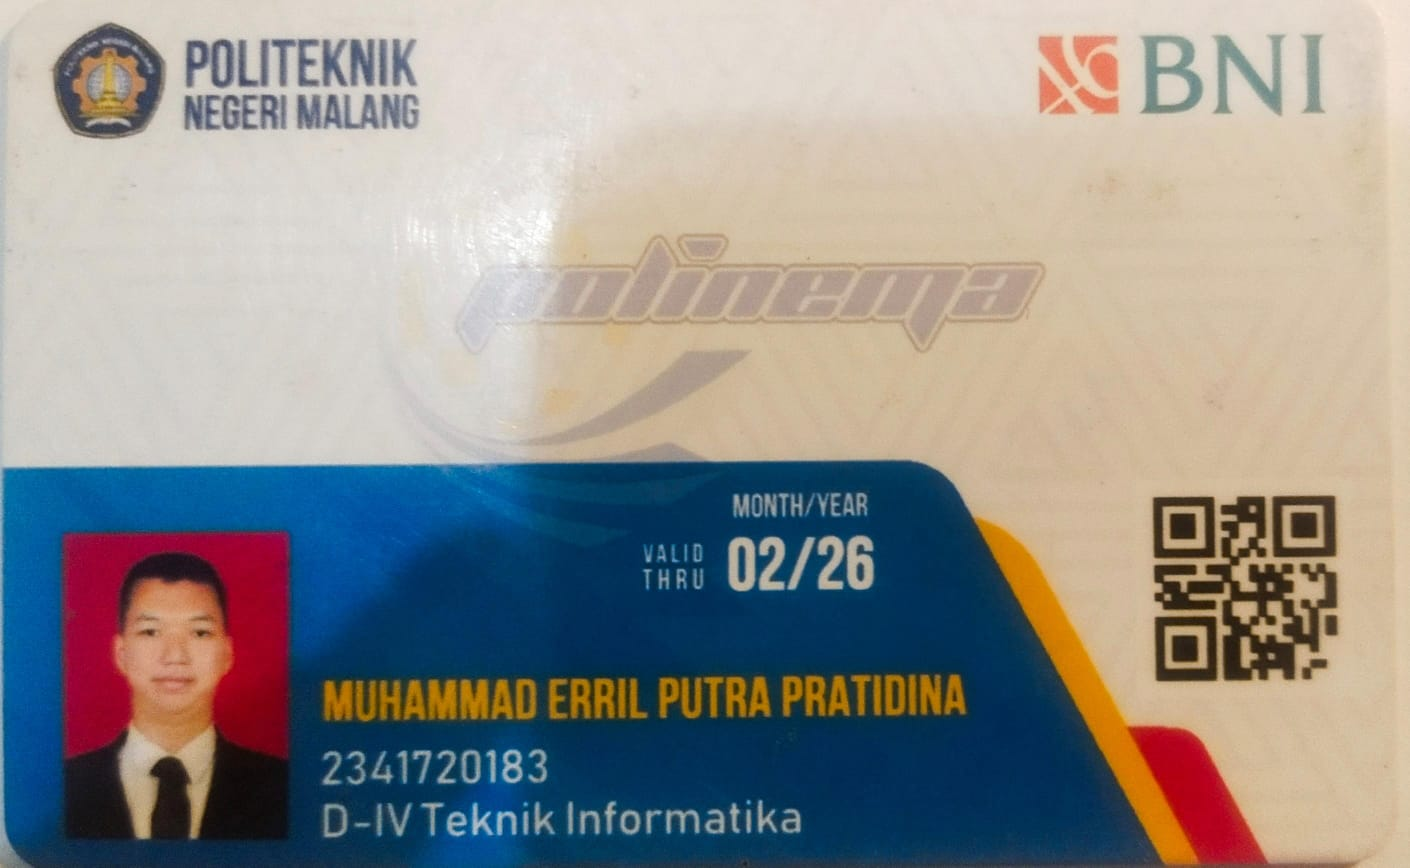

In [120]:
ktm = cv2.imread('/content/drive/MyDrive/PCVK/KTM.jpeg')
if ktm is None:
    print('Failed to load image file')
else:
    cv2_imshow(ktm)

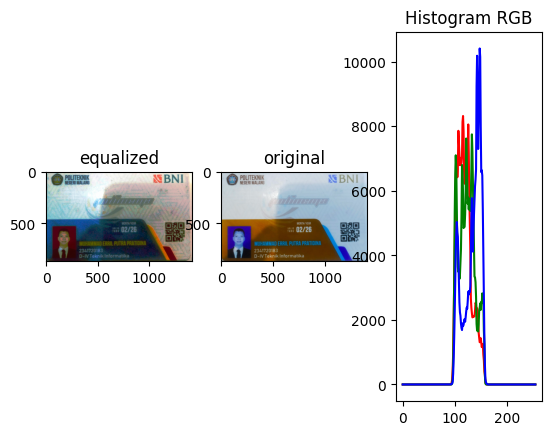

PSNR KTM:  28.0222870807562


In [121]:

ktm_r = cv2.split(ktm)[0]
ktm_g = cv2.split(ktm)[1]
ktm_b = cv2.split(ktm)[2]

ktm_r_equalized = cv2.equalizeHist(ktm_r)
ktm_g_equalized = cv2.equalizeHist(ktm_g)
ktm_b_equalized = cv2.equalizeHist(ktm_b)

ktm_result = cv2.cvtColor( cv2.merge((ktm_r_equalized, ktm_g_equalized, ktm_b_equalized)), cv2.COLOR_BGR2RGB)

histogram_r = cv2.calcHist([image], [0], None, [256], [0, 256])
histogram_g = cv2.calcHist([image], [1], None, [256], [0, 256])
histogram_b = cv2.calcHist([image], [2], None, [256], [0, 256])



plt.subplot(131)
plt.imshow(ktm_result)
plt.title('equalized')
plt.subplot(132)
plt.imshow(ktm)
plt.title('original')

plt.subplot(133)
plt.plot(histogram_r, color='red')
plt.plot(histogram_g, color='green')
plt.plot(histogram_b, color='blue')
plt.title('Histogram RGB')



plt.show()

def psnr(original, compared):
    mse = np.mean((original - compared) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 10 * np.log10((max_pixel ** 2) / mse)

psnr = psnr(ktm, ktm_result)

print("PSNR KTM: ", psnr)


# D-3 Tugas praktikum dithering



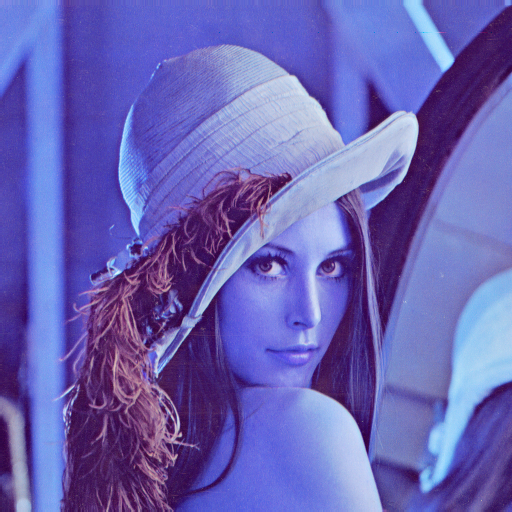

In [122]:
lena = cv2.imread('/content/drive/MyDrive/PCVK/lenna.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)
if lena is None:
    print('Failed to load image file')
else:
    cv2_imshow(lena)

## floyd-steinberg dithering

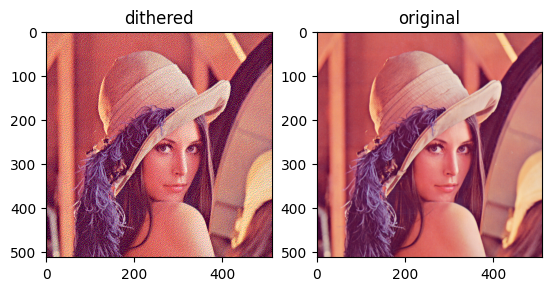

In [123]:


def floyd_steinberg(image):
  image = image
  for y in range(0,height-1):
    for x in range(0,width-1):
      old_pixel = image[y, x].copy()
      new_pixel = np.round(old_pixel / 255) * 255
      error = old_pixel - new_pixel

      if x+1 < width:
        image[y, x+1] = np.clip(image[y, x+1] + error * 7/16, 0, 255)

      if x-1 >= 0 and y+1 < height:
        image[y+1, x-1] = np.clip(image[y+1, x-1] + error * 3/16, 0, 255)

      if y+1 < height:
        image[y+1, x] = np.clip(image[y+1, x] + error * 5/16, 0, 255)

      if x+1 < width and y+1 < height:
        image[y+1, x+1] = np.clip(image[y+1, x+1] + error * 1/16, 0, 255)

  return image



def floyd_steinberg_dither_rgb(img):
    h, w, c = img.shape
    img = img.astype(np.float32)

    for y in range(h):
        for x in range(w):
            old_pixel = img[y, x].copy()
            new_pixel = np.round(old_pixel / 255.0) * 255
            img[y, x] = new_pixel
            error = old_pixel - new_pixel

            if x + 1 < w:
                img[y, x+1] += error * 7/16
            if x - 1 >= 0 and y + 1 < h:
                img[y+1, x-1] += error * 3/16
            if y + 1 < h:
                img[y+1, x] += error * 5/16
            if x + 1 < w and y + 1 < h:
                img[y+1, x+1] += error * 1/16

    img = np.clip(img, 0, 255)
    return img.astype(np.uint8)


dithered_image =  floyd_steinberg_dither_rgb(lena)

plt.subplot(121)
plt.imshow(dithered_image)
plt.title('dithered')
plt.subplot(122)
plt.imshow(lena)
plt.title('original')
plt.show()

## lena gray

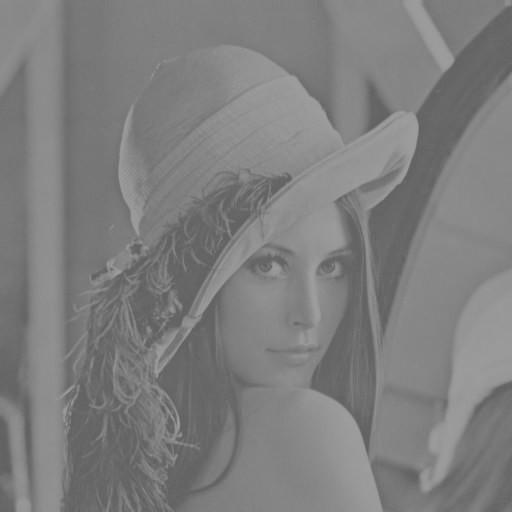

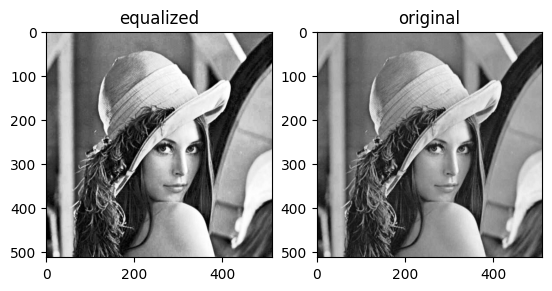

In [133]:
lena = cv2.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg', cv2.IMREAD_GRAYSCALE)
if lena is None:
    print('Failed to load image file')
else:
    cv2_imshow(lena)


equalized = cv2.equalizeHist(lena)

plt.subplot(121)
plt.imshow(equalized, cmap='gray')
plt.title('equalized')
plt.subplot(122)
plt.imshow(lena, cmap='gray')
plt.title('original')
plt.show()
#

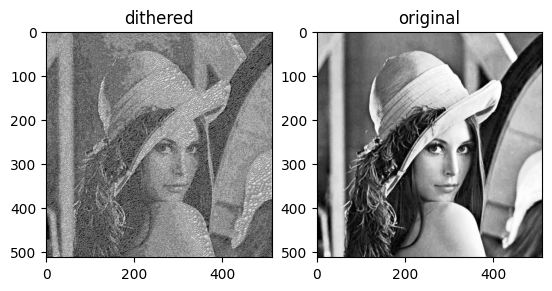

In [134]:
def floyd_steinberg(img):
  height, width = np.shape(img)
  for y in range(0,height-1):
    for x in range(0,width-1):
      old_pixel = img[y, x].copy()
      new_pixel = np.round(old_pixel / 255) * 255
      error = old_pixel - new_pixel

      if x+1 < width:
        img[y, x+1] = np.clip(img[y, x+1] + error * 7/16, 0, 255)

      if x-1 >= 0 and y+1 < height:
        img[y+1, x-1] = np.clip(img[y+1, x-1] + error * 3/16, 0, 255)

      if y+1 < height:
        img[y+1, x] = np.clip(img[y+1, x] + error * 5/16, 0, 255)

      if x+1 < width and y+1 < height:
        img[y+1, x+1] = np.clip(img[y+1, x+1] + error * 1/16, 0, 255)

  return img



plt.subplot(122)
plt.imshow(equalized, cmap='gray')
plt.title('original')
plt.subplot(121)
plt.imshow(floyd_steinberg(equalized), cmap='gray')
plt.title('dithered')
plt.show()